## Leitura de Dados

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("kc_house_data.csv")

## Análise Exploratória

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

## Visualização

In [27]:
import matplotlib.pyplot as plt

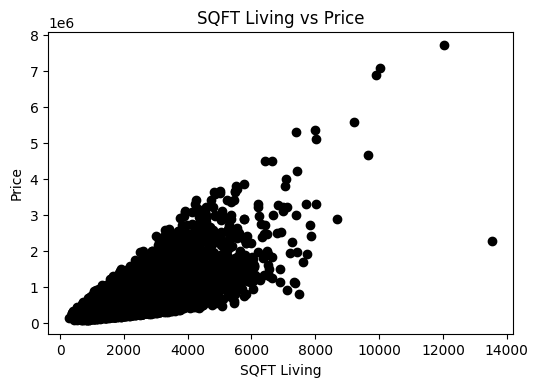

In [30]:
plt.rcParams["figure.dpi"] = 100
plt.scatter( data["sqft_living"], data["price"], color="black")
plt.title("SQFT Living vs Price")
plt.xlabel("SQFT Living")
plt.ylabel("Price")
plt.show()

In [12]:
import numpy as np

data_x = np.array(list(data["sqft_living"])).reshape(-1,1)
data_y = np.array(list(data["price"])).reshape(-1,1)

## Divisão dos dados

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data_x, data_y, test_size=0.3)

In [17]:
print("Treino:", len(x_treino))
print("Teste:", len(x_teste))

Treino: 15129
Teste: 6484


## Criação do Modelo

In [18]:
from sklearn import linear_model

In [19]:
modelo = linear_model.LinearRegression()
modelo.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print("Coeficiente: ", modelo.coef_)

Coeficiente:  [[287.6892724]]


## Predições

In [22]:
y_predicao = modelo.predict(x_teste)

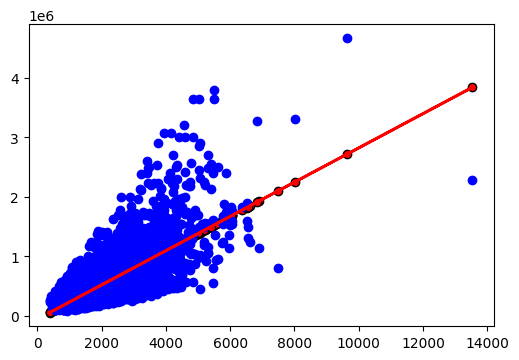

In [23]:
plt.scatter(x_teste, y_predicao, color="red", edgecolors="black")
plt.scatter(x_teste, y_teste, color="blue")
plt.plot(x_teste, y_predicao, color="red", linewidth=2)
plt.show()

## Métricas de Avaliação

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_teste, y_predicao)

In [26]:
print("MSE: ", mse)

MSE:  64715750319.07062
